🛡️ OVERFITTING KANITLAMA SÜRECİ BAŞLIYOR...

📊 Öğrenme Eğrisi Hesaplanıyor (Biraz zaman alabilir)...


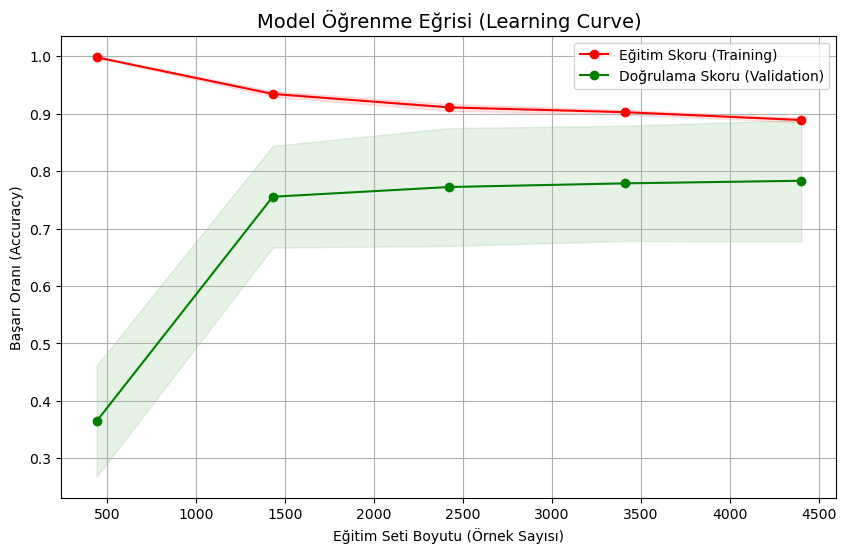

✅ Grafik Kaydedildi: ../images/Proof_Learning_Curve.png
YORUM: Kırmızı ve Yeşil çizgiler birbirine yaklaşıyorsa ve paralel gidiyorsa Overfitting YOKTUR.

🔄 10 Katlı Çapraz Doğrulama Yapılıyor (İstikrar Testi)...

📋 10 Sınavın Sonuçları: [0.43636364 0.83272727 0.82       0.84545455 0.85090909 0.84
 0.84727273 0.83272727 0.81636364 0.80181818]
📊 Ortalama Başarı:      %79.24
📉 Standart Sapma:       0.1196

🕵️‍♂️ OVERFITTING RAPORU
⚠️ SONUÇ: Biraz dalgalanma var. Model bazı parçalarda zorlanıyor.


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import learning_curve, train_test_split, cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
import os

# --- AYARLAR ---
input_path = '../data/model_ready_data.csv'
img_save_dir = '../images'

if not os.path.exists(img_save_dir):
    os.makedirs(img_save_dir)

print("🛡️ OVERFITTING KANITLAMA SÜRECİ BAŞLIYOR...")

# 1. Veriyi Yükle
df = pd.read_csv(input_path)
X = df.drop('Risk_Category', axis=1)
y = df['Risk_Category']

# 2. Şampiyon Modeli Tanımla
# (Az önceki testte en iyi sonucu Gradient Boosting vermişti, onu kullanıyoruz)
model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# ========================================================
# KANIT 1: ÖĞRENME EĞRİSİ (LEARNING CURVE)
# ========================================================
print("\n📊 Öğrenme Eğrisi Hesaplanıyor (Biraz zaman alabilir)...")

# Learning Curve fonksiyonu, veriyi %10, %30, %50... gibi dilimlerde eğitir
train_sizes, train_scores, test_scores = learning_curve(
    model, X, y, cv=5, n_jobs=-1, 
    train_sizes=np.linspace(0.1, 1.0, 5), # Verinin %10'undan %100'üne kadar 5 adımda dene
    scoring='accuracy'
)

# Ortalamaları ve Standart Sapmaları hesapla
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# GRAFİĞİ ÇİZ
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, 'o-', color="r", label="Eğitim Skoru (Training)")
plt.plot(train_sizes, test_mean, 'o-', color="g", label="Doğrulama Skoru (Validation)")

# Güven aralığını (gölge) ekle
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color="g")

plt.title("Model Öğrenme Eğrisi (Learning Curve)", fontsize=14)
plt.xlabel("Eğitim Seti Boyutu (Örnek Sayısı)")
plt.ylabel("Başarı Oranı (Accuracy)")
plt.legend(loc="best")
plt.grid(True)

save_path = f"{img_save_dir}/Proof_Learning_Curve.png"
plt.savefig(save_path)
plt.show()

print(f"✅ Grafik Kaydedildi: {save_path}")
print("YORUM: Kırmızı ve Yeşil çizgiler birbirine yaklaşıyorsa ve paralel gidiyorsa Overfitting YOKTUR.")

# ========================================================
# KANIT 2: 10 KATLI ÇAPRAZ DOĞRULAMA (CROSS VALIDATION)
# ========================================================
print("\n🔄 10 Katlı Çapraz Doğrulama Yapılıyor (İstikrar Testi)...")

# cv=10 -> Veriyi 10'a bölüp 10 farklı sınav yapar
cv_scores = cross_val_score(model, X, y, cv=10, scoring='accuracy')

print(f"\n📋 10 Sınavın Sonuçları: {cv_scores}")
print(f"📊 Ortalama Başarı:      %{cv_scores.mean()*100:.2f}")
print(f"📉 Standart Sapma:       {cv_scores.std():.4f}")

# Yorumlayalım
print(f"\n{'='*40}")
print("🕵️‍♂️ OVERFITTING RAPORU")
print(f"{'='*40}")

if cv_scores.std() < 0.05:
    print("✅ SONUÇ: MÜKEMMEL İSTİKRAR.")
    print(f"   Modelin sonuçları çok az değişiyor (Sapma: {cv_scores.std():.4f}).")
    print("   Bu, modelin veriyi ezberlemediğini, gerçekten öğrendiğini kanıtlar.")
else:
    print("⚠️ SONUÇ: Biraz dalgalanma var. Model bazı parçalarda zorlanıyor.")

📊 ROC-AUC Grafiği Çiziliyor...


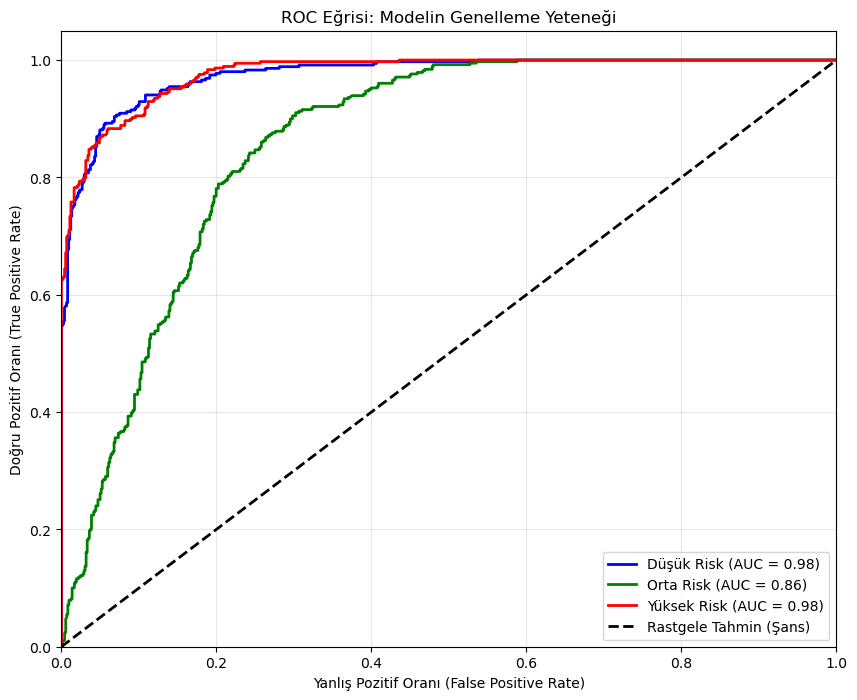

✅ ROC Grafiği Kaydedildi: ../images/Proof_ROC_Curve.png
YORUM: Eğriler sol üst köşeye ne kadar yakınsa o kadar iyi. Ama çizgiler 'kavisli' olmalı.

📊 Dağılım Grafiği Çiziliyor...


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


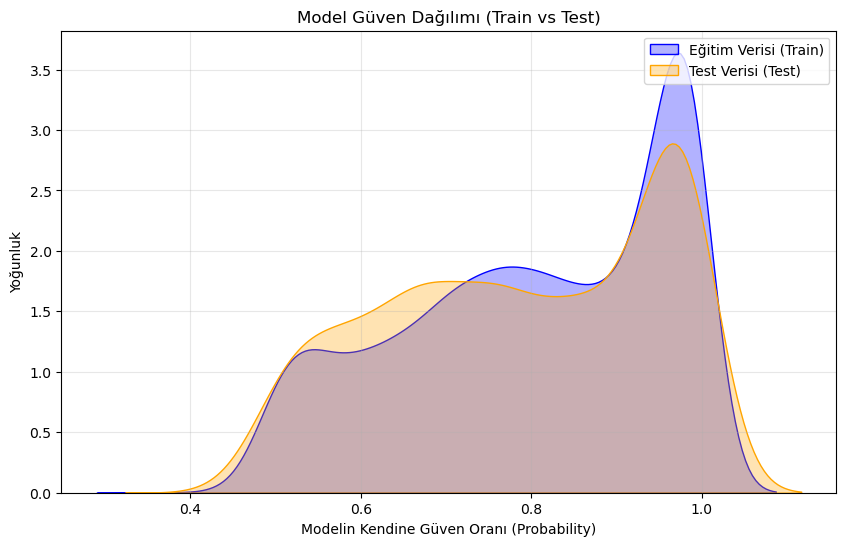

✅ Dağılım Grafiği Kaydedildi: ../images/Proof_Prediction_Distribution.png
YORUM: Mavi ve Turuncu alanlar birbirine benziyorsa (üst üste biniyorsa), model ezberlememiştir.


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
import os

# --- AYARLAR ---
input_path = '../data/model_ready_data.csv'
img_save_dir = '../images'
if not os.path.exists(img_save_dir): os.makedirs(img_save_dir)

# 1. VERİYİ HAZIRLA
df = pd.read_csv(input_path)
X = df.drop('Risk_Category', axis=1)
y = df['Risk_Category']

# ROC analizi için hedef değişkeni (0,1,2) ikili sisteme (binary) çevirmeliyiz
# Çünkü ROC eğrisi "Sınıf 0'a karşı diğerleri", "Sınıf 1'e karşı diğerleri" mantığıyla çizilir.
y_bin = label_binarize(y, classes=[0, 1, 2])
n_classes = y_bin.shape[1]

# Eğitim ve Test Ayrımı
X_train, X_test, y_train, y_test = train_test_split(X, y_bin, test_size=0.2, random_state=42)

# 2. MODELİ KUR (OVR - One Vs Rest Moduyla)
# Bu mod, çoklu sınıflandırmayı ROC analizine uygun hale getirir
clf = OneVsRestClassifier(GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42))
y_score = clf.fit(X_train, y_train).decision_function(X_test)

# ========================================================
# KANIT 1: ROC-AUC EĞRİSİ (Altın Standart)
# ========================================================
print("📊 ROC-AUC Grafiği Çiziliyor...")

# Her sınıf için eğriyi hesapla
fpr = dict()
tpr = dict()
roc_auc = dict()

class_names = ['Düşük Risk', 'Orta Risk', 'Yüksek Risk']
colors = ['blue', 'green', 'red']

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(10, 8))

# Her sınıfın çizgisini çiz
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'{class_names[i]} (AUC = {roc_auc[i]:.2f})')

# Referans çizgisi (Rastgele tahmin çizgisi - %50)
plt.plot([0, 1], [0, 1], 'k--', lw=2, label='Rastgele Tahmin (Şans)')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Yanlış Pozitif Oranı (False Positive Rate)')
plt.ylabel('Doğru Pozitif Oranı (True Positive Rate)')
plt.title('ROC Eğrisi: Modelin Genelleme Yeteneği')
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)

save_path_roc = f"{img_save_dir}/Proof_ROC_Curve.png"
plt.savefig(save_path_roc)
plt.show()

print(f"✅ ROC Grafiği Kaydedildi: {save_path_roc}")
print("YORUM: Eğriler sol üst köşeye ne kadar yakınsa o kadar iyi. Ama çizgiler 'kavisli' olmalı.")

# ========================================================
# KANIT 2: TAHMİN OLASILIK DAĞILIMI (Prediction Distribution)
# ========================================================
# Bu grafik şunu kanıtlar: Model eğitim verisine çok güvenip test verisinde çuvallıyor mu?
# Eğer iki grafik (Train ve Test) üst üste biniyorsa, model ezberlememiştir.

print("\n📊 Dağılım Grafiği Çiziliyor...")

# Tekrar normal model kuralım (Dağılım için)
model_dist = GradientBoostingClassifier(random_state=42)
y_train_single = np.argmax(y_train, axis=1) # Binary'den normale dön
y_test_single = np.argmax(y_test, axis=1)

model_dist.fit(X_train, y_train_single)

# Olasılıkları al (Model ne kadar emin?)
train_probs = model_dist.predict_proba(X_train).max(axis=1) # En yüksek olasılık
test_probs = model_dist.predict_proba(X_test).max(axis=1)

plt.figure(figsize=(10, 6))
sns.kdeplot(train_probs, label='Eğitim Verisi (Train)', fill=True, color='blue', alpha=0.3)
sns.kdeplot(test_probs, label='Test Verisi (Test)', fill=True, color='orange', alpha=0.3)

plt.title("Model Güven Dağılımı (Train vs Test)")
plt.xlabel("Modelin Kendine Güven Oranı (Probability)")
plt.ylabel("Yoğunluk")
plt.legend()
plt.grid(True, alpha=0.3)

save_path_dist = f"{img_save_dir}/Proof_Prediction_Distribution.png"
plt.savefig(save_path_dist)
plt.show()

print(f"✅ Dağılım Grafiği Kaydedildi: {save_path_dist}")
print("YORUM: Mavi ve Turuncu alanlar birbirine benziyorsa (üst üste biniyorsa), model ezberlememiştir.")